In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("/content/wine-clustering.csv")

In [ ]:
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [ ]:
df.isnull().sum()

,0
Alcohol,0
Malic_Acid,0
Ash,0
Ash_Alcanity,0
Magnesium,0
Total_Phenols,0
Flavanoids,0
Nonflavanoid_Phenols,0
Proanthocyanins,0
Color_Intensity,0


In [ ]:
df.describe()

In [ ]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

In [ ]:
# Finding the optimal number of clusters
def calculate_elbow(data):
    sse = []
    rng = range(2,11)
    for i in rng:
        kmeans = KMeans(n_clusters = i, random_state = 42)
        kmeans.fit(data)
        sse.append(kmeans.inertia_)

    plt.plot(rng, sse, marker= "o")
    plt.title("ELBOW METHOD", fontsize = 14)
    plt.xlabel("Number of clusters", fontsize = 14)
    plt.ylabel("Sum of Square Errors", fontsize = 14)
    plt.show()

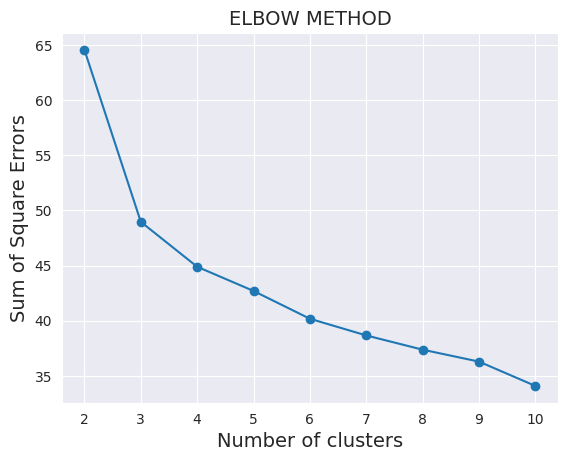

In [ ]:
calculate_elbow(df_scaled)

as we see the best number of clusters is 3

In [ ]:
from sklearn.metrics import silhouette_score

def silhouette(data):
    rng = range(2,11)
    for i in rng:
        kmeans = KMeans(n_clusters = i, random_state = 42)
        kmeans.fit(data)
        real_cluster = scaler.inverse_transform(data)
        score = silhouette_score(real_cluster, kmeans.labels_)
        print("n_clusters: ",i,"silhouette score:",score)

silhouette(df_scaled)

n_clusters:  2 silhouette score: 0.11827497615521392
n_clusters:  3 silhouette score: 0.22055872708985494
n_clusters:  4 silhouette score: 0.1262202435807892
n_clusters:  5 silhouette score: 0.0459064104763536
n_clusters:  6 silhouette score: 0.01937056603102941
n_clusters:  7 silhouette score: -0.08897151713026119
n_clusters:  8 silhouette score: -0.09025062220286019
n_clusters:  9 silhouette score: -0.2230933489995145
n_clusters:  10 silhouette score: -0.23022258427130315


In [ ]:
explained_variance = []
rng = range(1,len(df.columns))

for i in rng:
    pca_model = PCA(n_components = i)
    pca_model.fit_transform(df)

    explained_variance.append(np.sum(pca_model.explained_variance_ratio_))

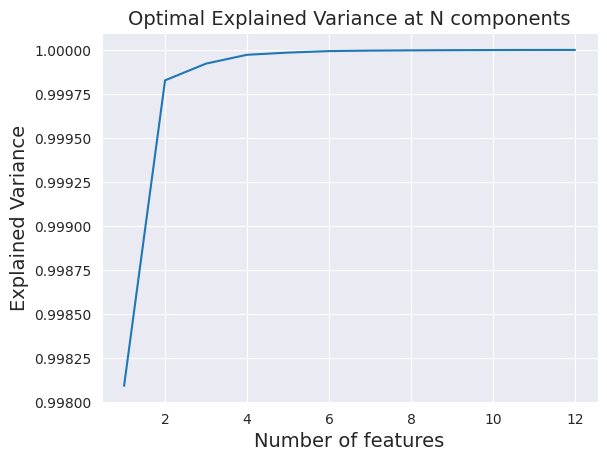

In [ ]:
sns.lineplot(x = rng, y=explained_variance)
plt.title("Optimal Explained Variance at N components",fontsize = 14)
plt.xlabel("Number of features",fontsize = 14)
plt.ylabel("Explained Variance",fontsize = 14)
plt.show()

we can use PCA for dimensionality reduction

In [ ]:
pca = PCA(n_components = 3)
pca.fit_transform(df)
np.sum(pca.explained_variance_ratio_)

0.9999221050741547

In [ ]:
df_reduced = pd.DataFrame(pca.fit_transform(df),columns = ["PCA1","PCA2","PCA3"])
df_reduced

,PCA1,PCA2,PCA3
0,318.562979,21.492131,-3.130735
1,303.097420,-5.364718,-6.822835
2,438.061133,-6.537309,1.113223
3,733.240139,0.192729,0.917257
4,-11.571428,18.489995,0.554422
...,...,...,...
173,-6.980211,-4.541137,2.474707
174,3.131605,2.335191,4.309931
175,88.458074,18.776285,2.237577
176,93.456242,18.670819,1.788392


In [ ]:
df_reduced_scaled = scaler.fit_transform(df_reduced)

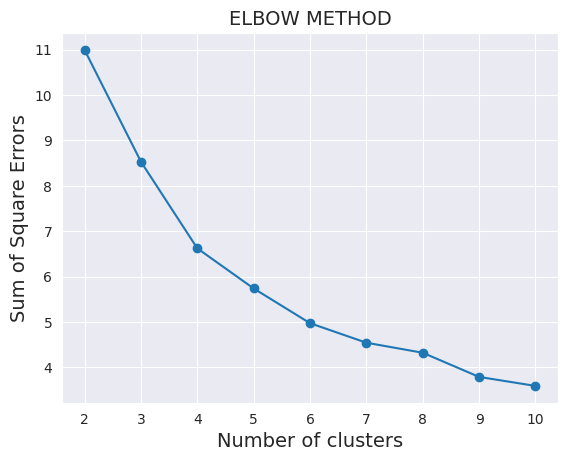

In [ ]:
calculate_elbow(df_reduced_scaled)

In [ ]:
silhouette(df_reduced_scaled)

n_clusters:  2 silhouette score: 0.6535952968900611
n_clusters:  3 silhouette score: 0.1795937005841067
n_clusters:  4 silhouette score: 0.1399553019343031
n_clusters:  5 silhouette score: 0.059779881693483604
n_clusters:  6 silhouette score: 0.0598735831684581
n_clusters:  7 silhouette score: 0.030664325947290034
n_clusters:  8 silhouette score: 0.030951671144592238
n_clusters:  9 silhouette score: -0.052862314106127795
n_clusters:  10 silhouette score: -0.05795337743706491


After that we can say 3 clusters is the best choice

In [ ]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(df_reduced_scaled)

KMeans(n_clusters=2)

In [ ]:
df_reduced

,PCA1,PCA2,PCA3
0,318.562979,21.492131,-3.130735
1,303.097420,-5.364718,-6.822835
2,438.061133,-6.537309,1.113223
3,733.240139,0.192729,0.917257
4,-11.571428,18.489995,0.554422
...,...,...,...
173,-6.980211,-4.541137,2.474707
174,3.131605,2.335191,4.309931
175,88.458074,18.776285,2.237577
176,93.456242,18.670819,1.788392


In [ ]:
real_clusters = scaler.inverse_transform(df_reduced_scaled)
real_center = scaler.inverse_transform(kmeans.cluster_centers_)

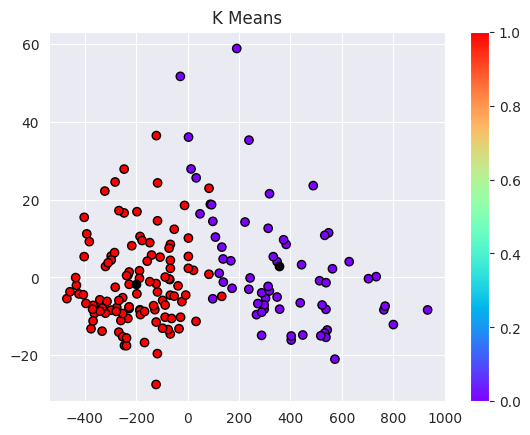

In [ ]:
f, (ax1) = plt.subplots(1,1,sharey=True)
ax1.set_title("K Means")

scatter = ax1.scatter(real_clusters[:, 0], real_clusters[:, 1],
                      c=kmeans.labels_, cmap="rainbow",
                      edgecolor='black')

ax1.scatter(real_center[:,0], real_center[:,1], color='black', marker = "o")

plt.colorbar(scatter, ax=ax1)
plt.show()

In [ ]:
df["Cluster_ID"] = kmeans.labels_

features = df.drop("Cluster_ID",axis =1)
feature_cols = features.columns

cluster_means = df.groupby('Cluster_ID')[feature_cols].mean()

In [ ]:
cluster_means

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
Cluster_ID,,,,,,,,,,,,,
0,13.615937,1.953594,2.401406,17.243750,108.921875,2.745938,2.799219,0.288281,1.910000,5.555937,1.049781,3.051563,1101.375000
1,12.655175,2.551228,2.346930,20.758772,94.587719,2.042018,1.597018,0.403158,1.411754,4.778596,0.905614,2.364737,547.885965


As the wine with higher level of Alcohol, Total Phenols & ColorIntensity,etc tends to be better quality wine. Thus we can conclude that cluster 0 has good quality wine and cluster 1 has bad quality wine so that we now have converted this in a classification problem

In [ ]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Cluster_ID
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


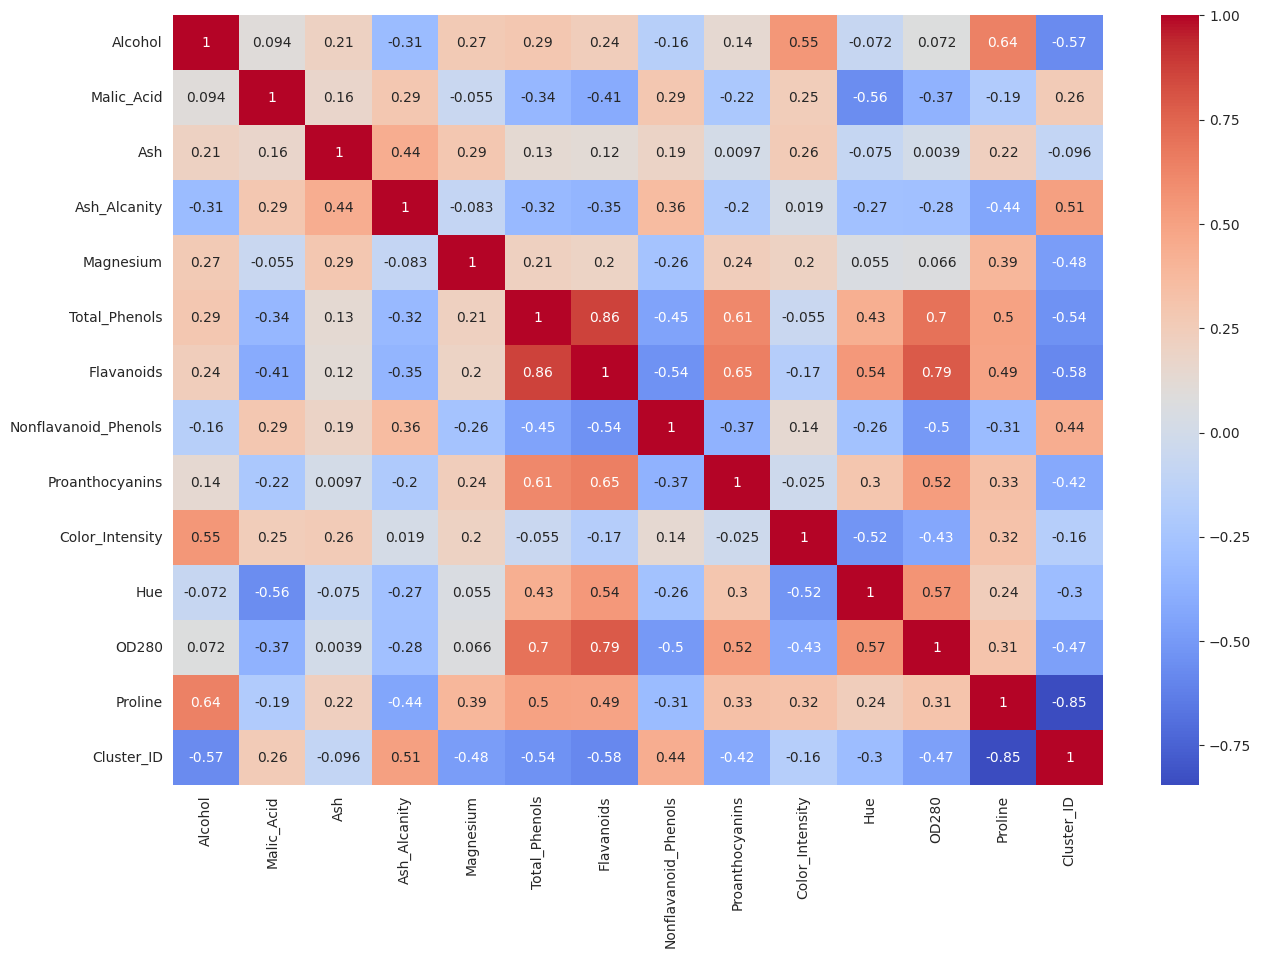

In [ ]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(),cmap = "coolwarm",annot = True)
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

x = df.drop("Cluster_ID",axis = 1)
y = df["Cluster_ID"]

x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)
S_scaler = StandardScaler()

In [ ]:
x_train_scaled = S_scaler.fit_transform(x_train)
x_test_scaled = S_scaler.transform(x_test)

in my opinion logistic regression is the best choice

In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state = 42)

In [ ]:
LR.fit(x_train_scaled,y_train)

LogisticRegression(random_state=42)

In [ ]:
training_score = LR.score(x_train_scaled,y_train)
training_score

0.9929577464788732

In [ ]:
y_pred = LR.predict(x_test_scaled)

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score,classification_report
def evalutemodel(ytest,ypred,model):
    acc_score = accuracy_score(ytest,ypred)
    print("The total accuracy score of the model is: ",acc_score*100)

    print("==========================================================")
    print(classification_report(ytest,ypred))
    print("==========================================================")

    confusion_mat = confusion_matrix(ytest,ypred)
    fig = ConfusionMatrixDisplay(confusion_mat,display_labels = model.classes_)
    fig.plot(include_values = True)
    fig.ax_.set_title("Confusion Matrix")
    fig.ax_.grid(False)


The total accuracy score of the model is:  97.22222222222221
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.96      1.00      0.98        22

    accuracy                           0.97        36
   macro avg       0.98      0.96      0.97        36
weighted avg       0.97      0.97      0.97        36



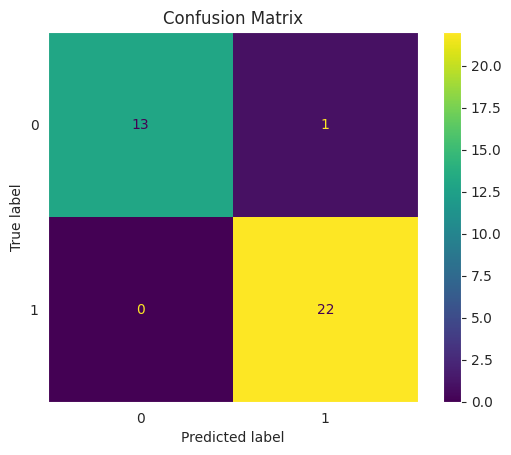

In [ ]:
evalutemodel(y_test,y_pred,LR)